In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#How to add the file to gdrive

1. Open the drive link shared
2. Click the three dots next to ***HV-AI-2025*** and select 'Make a copy'

In [171]:
!cp (original_location) /content/HV-AI-2025.zip
!unzip HV-AI-2025.zip
!rm -rf /content/__MACOSX
!mv /content/HV-AI-2025/* /content/
!rm -rf /content/HV-AI-2025
!rm /content/HV-AI-2025.zip
!rm -rf /content/sample_data
from google.colab import output


/bin/bash: -c: line 1: syntax error near unexpected token `original_location'
/bin/bash: -c: line 1: `cp (original_location) /content/HV-AI-2025.zip'
unzip:  cannot find or open HV-AI-2025.zip, HV-AI-2025.zip.zip or HV-AI-2025.zip.ZIP.
mv: cannot move '/content/HV-AI-2025/labeled_data' to '/content/labeled_data': Directory not empty
mv: cannot move '/content/HV-AI-2025/unlabeled_data' to '/content/unlabeled_data': Directory not empty
rm: cannot remove '/content/HV-AI-2025.zip': No such file or directory


### HERE I HAVE UNZIPPED THE DATA DIRECTLY FROM THE DRIVE

# **Plot Sample Images**

In [2]:
! unzip "/content/drive/MyDrive/Copy of HV-AI-2025.zip" -d train_data

Streaming output truncated to the last 5000 lines.
  inflating: train_data/HV-AI-2025/unlabeled_data/images/OIP-Pn9quPZZ4H8fJ939NLrsIgHaFj.jpeg  
  inflating: train_data/HV-AI-2025/unlabeled_data/images/OIP-IIeVvMzmadmWndWvfSpaKQHaE9.jpeg  
  inflating: train_data/HV-AI-2025/unlabeled_data/images/OIP-4t4U7LOzS-GByUxY_8ylMwHaFf.jpeg  
  inflating: train_data/HV-AI-2025/unlabeled_data/images/OIP-6Te7FgW0INPUUNl32tgW1QHaHa.jpeg  
  inflating: train_data/HV-AI-2025/unlabeled_data/images/921.jpeg  
  inflating: train_data/HV-AI-2025/unlabeled_data/images/OIP-7z-PsChIDdT8KECFqWQCRwHaEr.jpeg  
  inflating: train_data/HV-AI-2025/unlabeled_data/images/OIP-CE_0FI0DXtkH3rmQt4OiyAHaE7.jpeg  
  inflating: train_data/HV-AI-2025/unlabeled_data/images/OIP-RsoOv56vjNaHJcERlx21SwHaHv.jpeg  
  inflating: train_data/HV-AI-2025/unlabeled_data/images/ea37b80e2ef5023ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg  
  inflating: train_data/HV-AI-2025/unlabeled_data/images/OIP-LiaYVqnIYT9kpq_TwYmKJQH

In [172]:
!apt-get install tree
!tree -L 2


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
.
├── best_model.pth
├── drive
│   └── MyDrive
├── HV-AI-2025-Test
│   └── test_images
├── HV-AI-2025-Test.zip
├── labeled_data
│   ├── images
│   └── labeled_data.csv
├── submission.csv
├── Test_Data
│   └── HV-AI-2025-Test
├── train_data
│   └── HV-AI-2025
└── unlabeled_data
    └── images

12 directories, 4 files


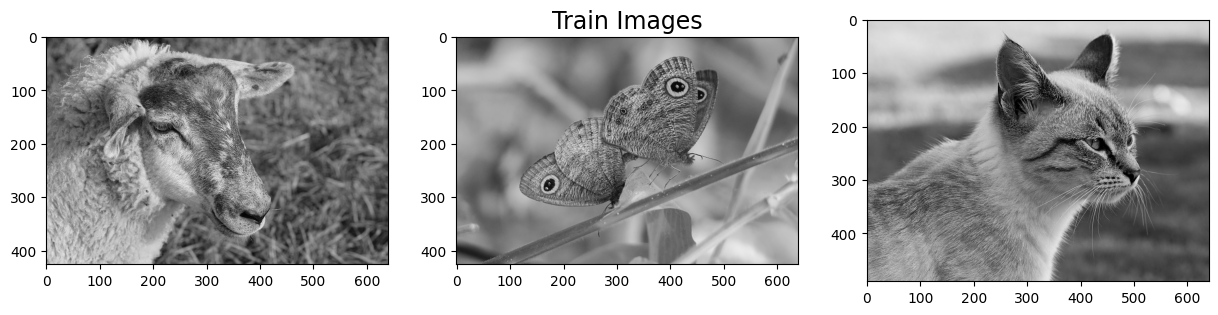

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob


train_images = glob('/content/train_data/HV-AI-2025/labeled_data/images/*.jpg')[0:3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, image in enumerate(train_images):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

axes[1].set_title('Train Images',fontsize=17)
plt.show()

# **Load/Preprocess **data****

Total samples: 779
Class distribution:
label
cane          145
ragno         144
gallina        92
cavallo        78
farfalla       63
mucca          55
scoiattolo     55
pecora         54
gatto          50
elefante       43
Name: count, dtype: int64


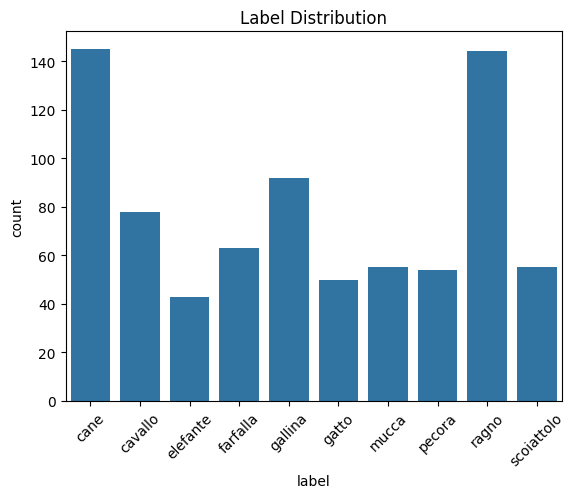

In [7]:
import pandas as pd
from glob import glob

# Load CSV with labels (adjust path and column names)
df = pd.read_csv('/content/train_data/HV-AI-2025/labeled_data/labeled_data.csv')  # sample CSV with 'image' and 'label' columns
print("Total samples:", len(df))
print("Class distribution:")
print(df['label'].value_counts())

# Optional: visualize distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.xticks(rotation=45)
plt.title('Label Distribution')
plt.show()


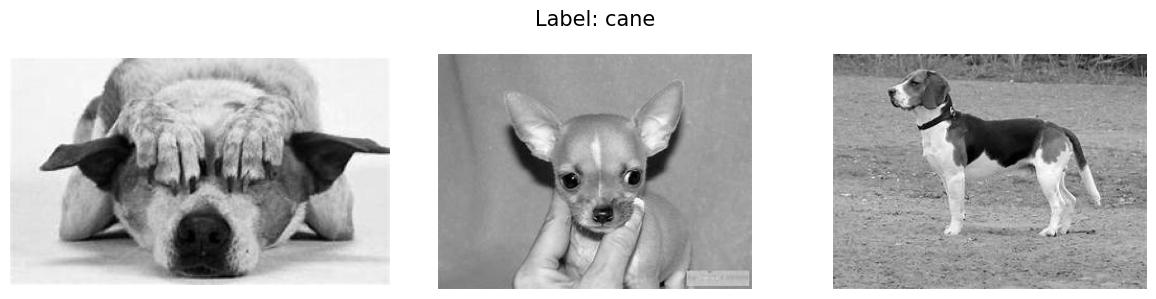

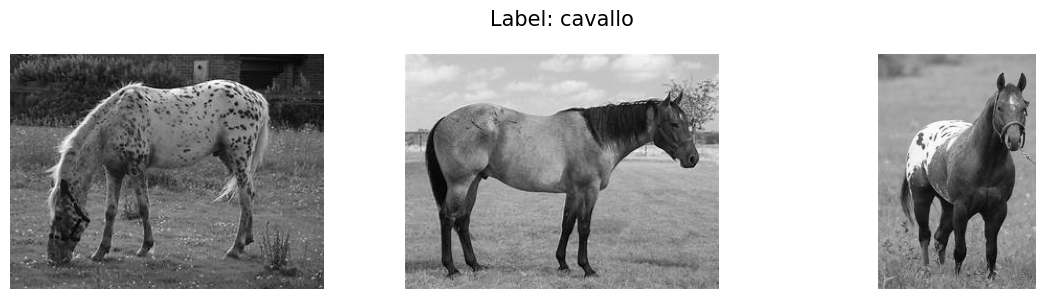

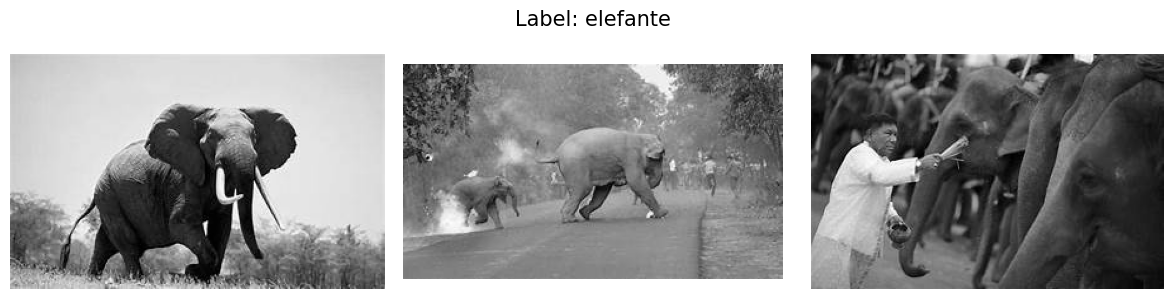

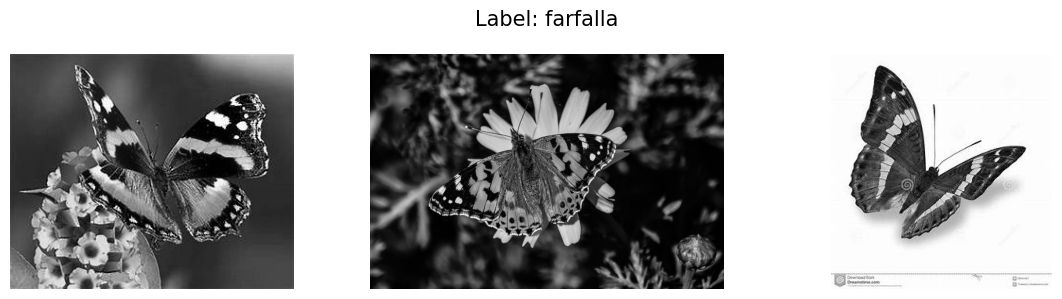

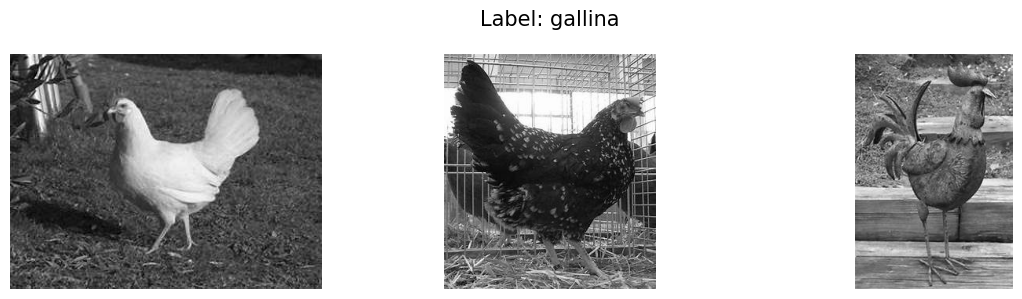

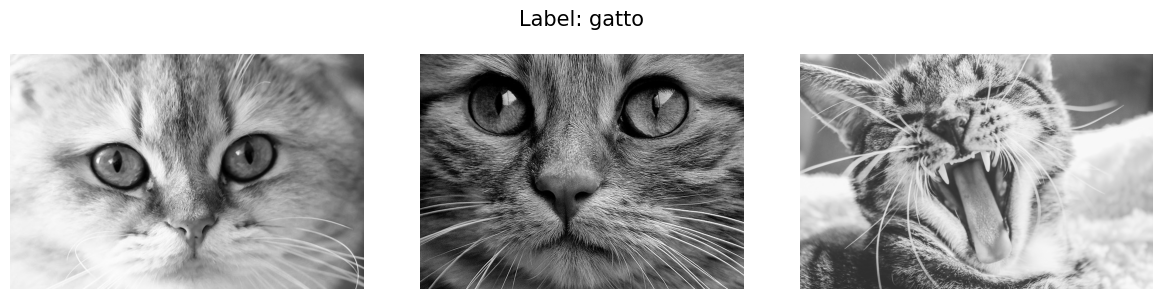

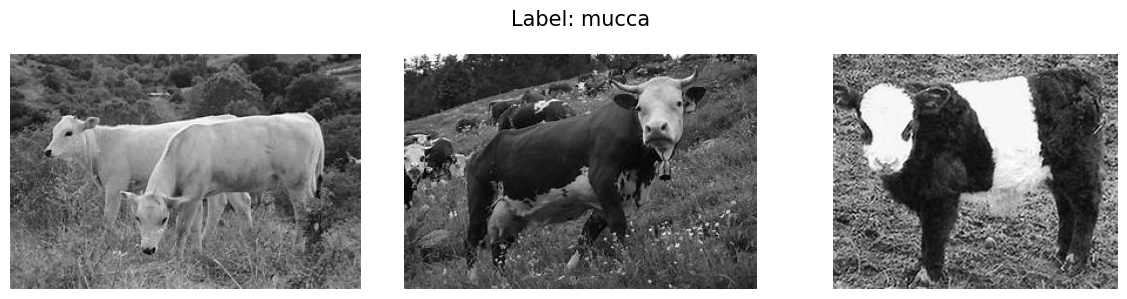

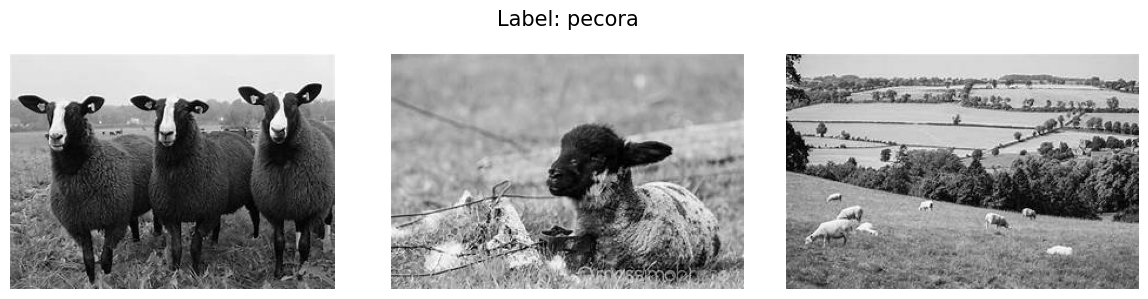

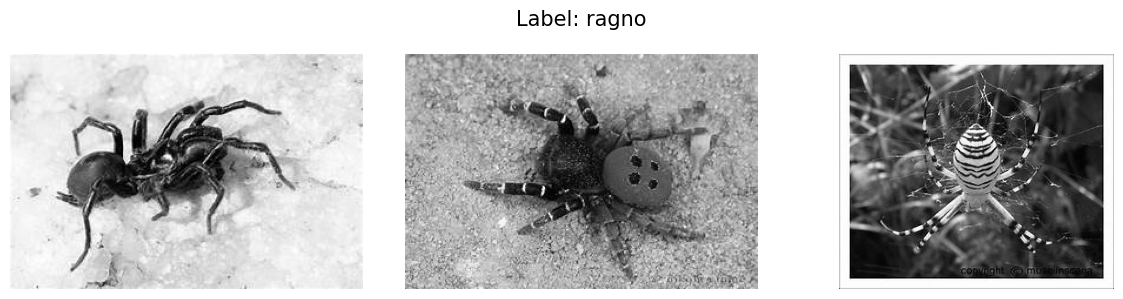

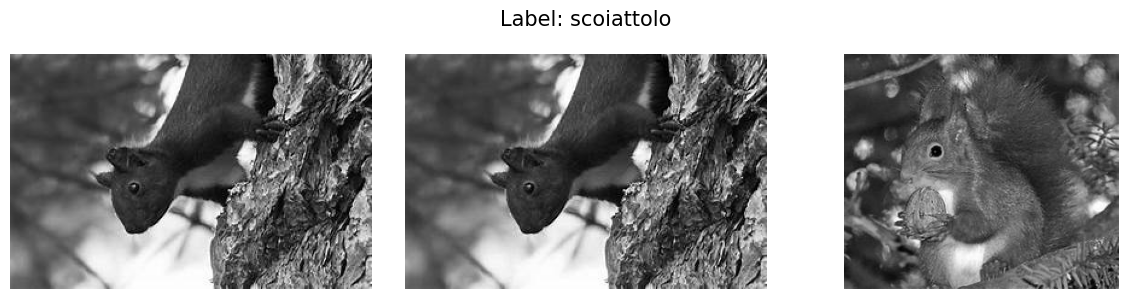

In [8]:
import matplotlib.pyplot as plt
import cv2
import os

def show_samples(df, img_folder, samples_per_class=3):
    classes = df['label'].unique()
    for cls in classes:
        subset = df[df['label'] == cls].sample(samples_per_class)
        fig, axes = plt.subplots(1, samples_per_class, figsize=(12, 3))
        fig.suptitle(f'Label: {cls}', fontsize=15)
        for i, (_, row) in enumerate(subset.iterrows()):
            img_path = os.path.join(img_folder, row['img_name'])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img)
            axes[i].axis('off')
        plt.tight_layout()
        plt.show()

# Run it
show_samples(df, '/content/train_data/HV-AI-2025/labeled_data/images')


In [10]:
import cv2
from tqdm import tqdm

img_folder = '/content/train_data/HV-AI-2025/labeled_data/images'  # replace this with your actual path
dims = []

for img_name in tqdm(df['img_name']):
    img_path = os.path.join(img_folder, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        dims.append(img.shape)
    else:
        print(f"Missing or unreadable image: {img_path}")


100%|██████████| 779/779 [00:00<00:00, 1147.80it/s]


In [12]:
from collections import Counter
Counter(dims)

Counter({(169, 300, 3): 37,
         (200, 300, 3): 93,
         (252, 300, 3): 2,
         (166, 300, 3): 1,
         (225, 300, 3): 133,
         (300, 300, 3): 41,
         (300, 257, 3): 2,
         (300, 169, 3): 4,
         (258, 300, 3): 3,
         (203, 300, 3): 4,
         (300, 225, 3): 12,
         (180, 300, 3): 7,
         (219, 300, 3): 4,
         (224, 300, 3): 6,
         (300, 211, 3): 2,
         (300, 239, 3): 4,
         (178, 300, 3): 2,
         (300, 231, 3): 1,
         (294, 300, 3): 3,
         (300, 208, 3): 1,
         (234, 300, 3): 4,
         (300, 299, 3): 3,
         (300, 200, 3): 10,
         (300, 226, 3): 7,
         (300, 256, 3): 1,
         (214, 300, 3): 8,
         (159, 300, 3): 1,
         (300, 264, 3): 1,
         (150, 300, 3): 4,
         (177, 300, 3): 1,
         (284, 300, 3): 2,
         (213, 300, 3): 4,
         (300, 192, 3): 1,
         (193, 300, 3): 1,
         (293, 300, 3): 1,
         (300, 236, 3): 2,
         (199, 300, 3

In [13]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset

class ImageCSVLoader(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

        # Clean the data
        self.data = self.data[~self.data['img_name'].isin(['img_name'])]
        self.data = self.data.dropna(subset=['img_name', 'label'])
        self.data.columns = ['filename', 'label']

        # Encode labels
        self.classes = sorted(self.data['label'].unique())
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        self.data['label_idx'] = self.data['label'].map(self.class_to_idx)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx]['filename']
        label = self.data.iloc[idx]['label_idx']
        img_path = os.path.join(self.img_dir, img_name)

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label


In [26]:
import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])



# from torchvision import transforms
# from torch.utils.data import DataLoader

# transform = transforms.Compose([
#     transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406],   # ResNet mean/std
#                          [0.229, 0.224, 0.225])
# ])





train_dataset = ImageCSVLoader(
    csv_file=r'/content/labeled_data/labeled_data.csv',
    img_dir=r'/content/labeled_data/images',
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [15]:
images, labels = next(iter(train_loader))
print(images.shape)  # should be [32, 3, 224, 224]
print(labels.shape)  # should be [32]


torch.Size([32, 3, 224, 224])
torch.Size([32])


# **Model initialization/Training**

In [16]:
import torch
import torch.nn as nn
from torchvision import models

# Get number of classes
num_classes = len(train_dataset.classes)

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)

# Replace final layer
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(torch.cuda.is_available())


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


True


In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [195]:
import torch
import os
num_epochs = 150
best_accuracy = 0.0  # Track best accuracy
save_path = 'best_model.pth'  # File name to save the model

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy = 100. * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

    # Save best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        torch.save(model.state_dict(), save_path)
        print(f"✅ Saved best model with accuracy: {best_accuracy:.2f}%")


Epoch [1/150], Loss: 31.6480, Accuracy: 59.56%
✅ Saved best model with accuracy: 59.56%
Epoch [2/150], Loss: 15.4936, Accuracy: 79.72%
✅ Saved best model with accuracy: 79.72%
Epoch [3/150], Loss: 7.2156, Accuracy: 91.14%
✅ Saved best model with accuracy: 91.14%
Epoch [4/150], Loss: 7.0444, Accuracy: 91.66%
✅ Saved best model with accuracy: 91.66%
Epoch [5/150], Loss: 6.1418, Accuracy: 92.55%
✅ Saved best model with accuracy: 92.55%
Epoch [6/150], Loss: 5.6129, Accuracy: 93.71%
✅ Saved best model with accuracy: 93.71%
Epoch [7/150], Loss: 4.9067, Accuracy: 93.71%
Epoch [8/150], Loss: 2.6449, Accuracy: 96.79%
✅ Saved best model with accuracy: 96.79%
Epoch [9/150], Loss: 2.8798, Accuracy: 97.43%
✅ Saved best model with accuracy: 97.43%
Epoch [10/150], Loss: 2.4287, Accuracy: 97.18%
Epoch [11/150], Loss: 2.8320, Accuracy: 96.41%
Epoch [12/150], Loss: 2.2913, Accuracy: 97.18%
Epoch [13/150], Loss: 2.4066, Accuracy: 97.43%
Epoch [14/150], Loss: 4.8674, Accuracy: 93.97%
Epoch [15/150], Loss:

KeyboardInterrupt: 

# **Model Inference**

In [18]:
# Load model weights
model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Set to evaluation mode


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

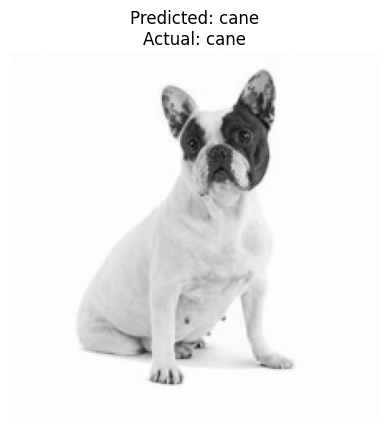

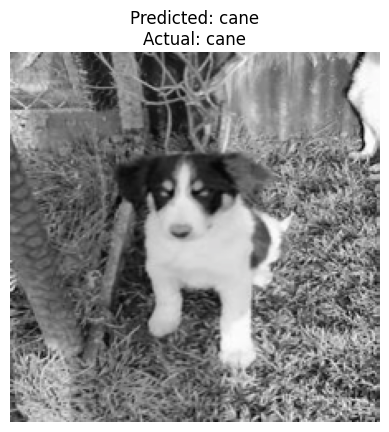

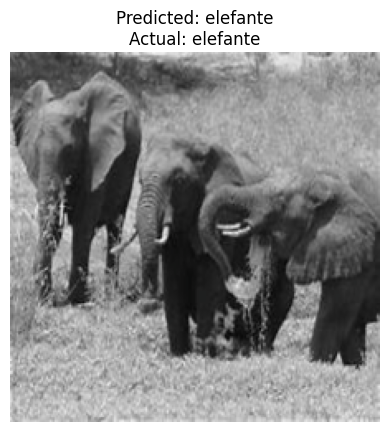

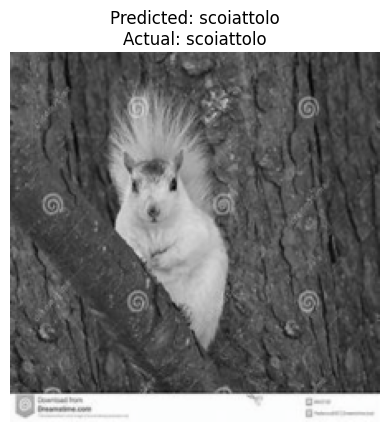

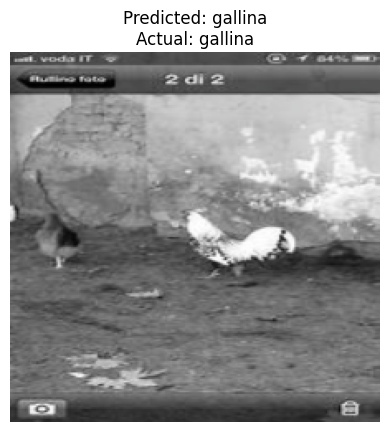

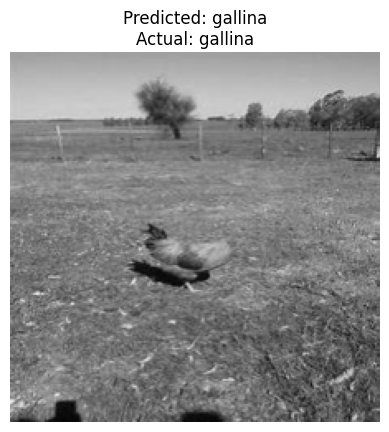

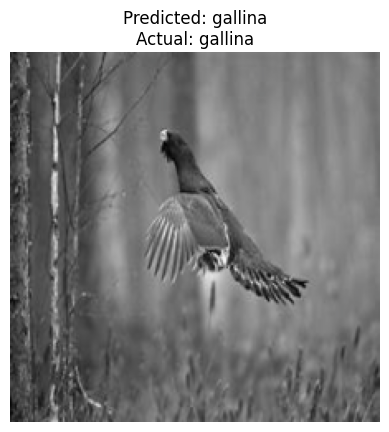

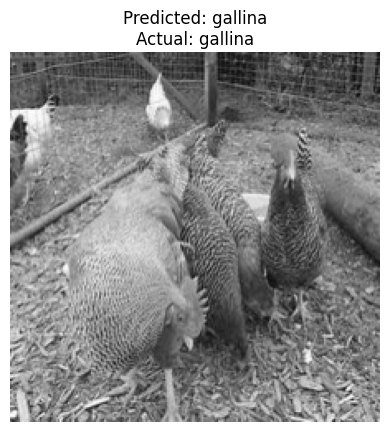

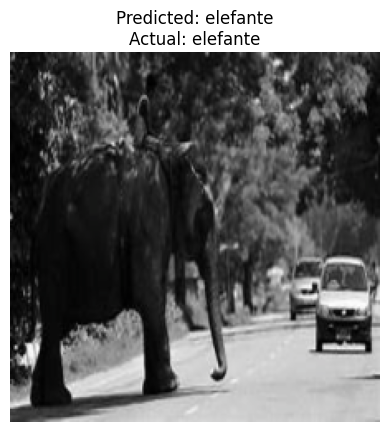

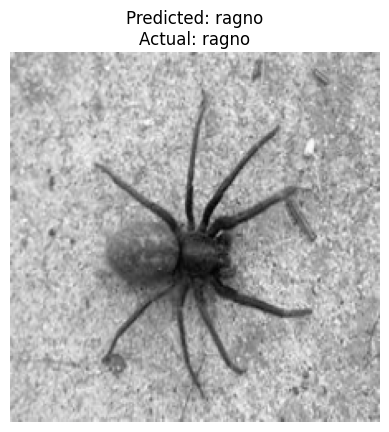

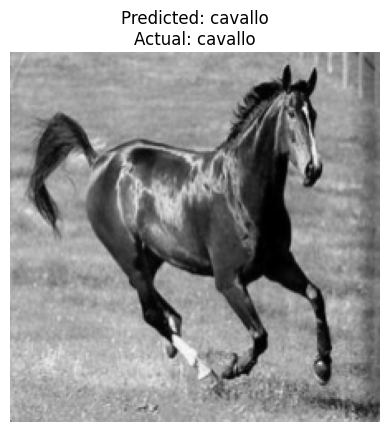

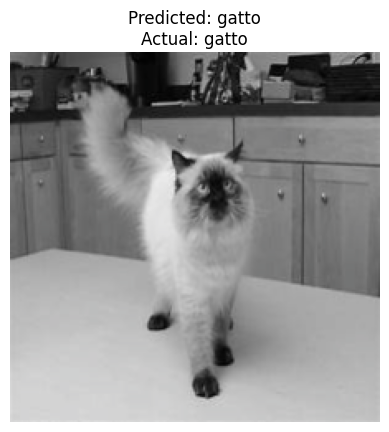

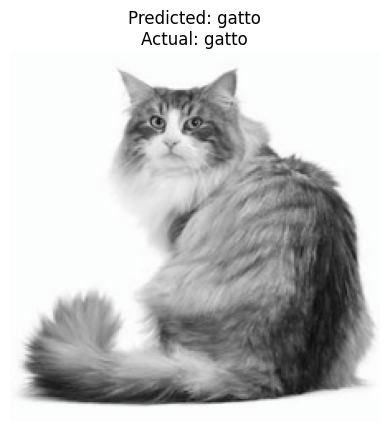

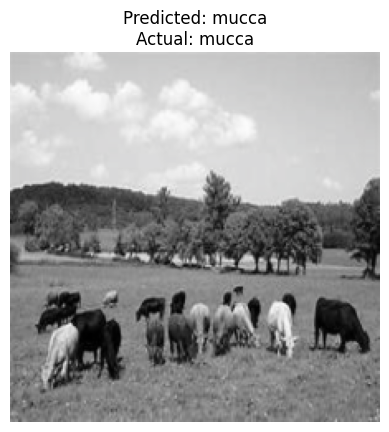

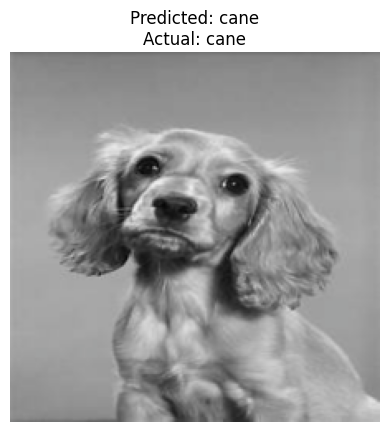

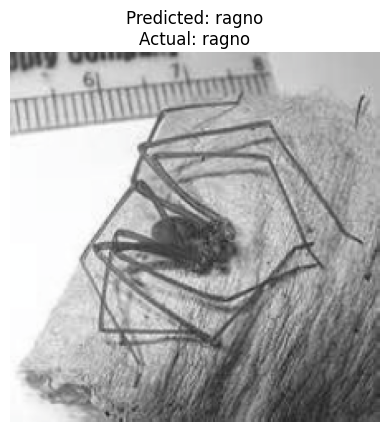

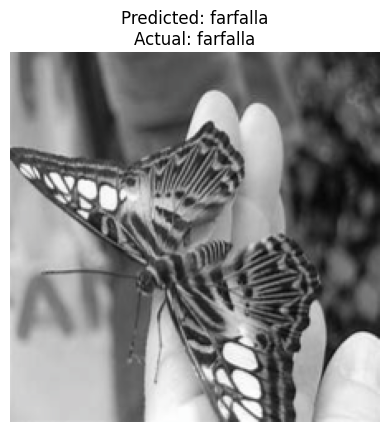

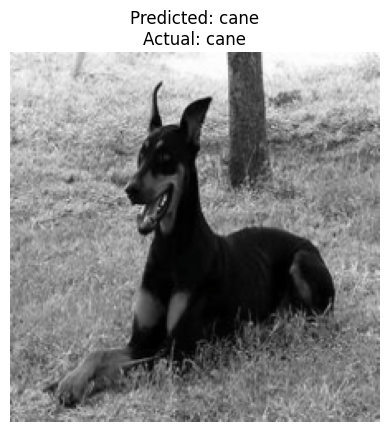

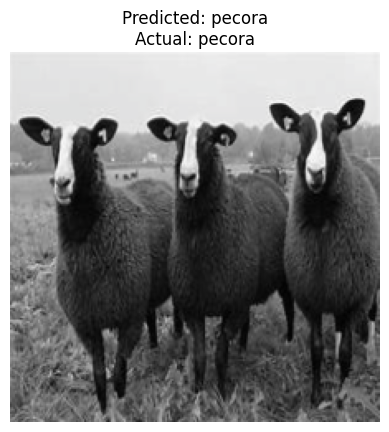

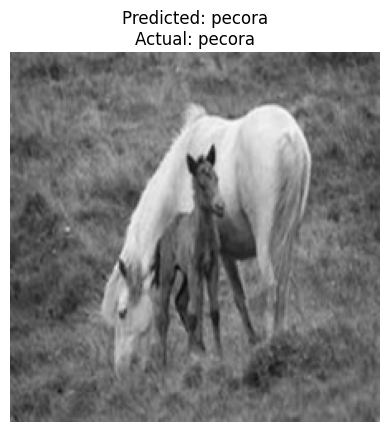

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Reverse class mapping
idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

# Get one batch
images, labels = next(iter(train_loader))
images = images.to(device)
labels = labels.to(device)

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Display few results
images = images.cpu()
predicted = predicted.cpu()
labels = labels.cpu()

for i in range(20):  # Show 20 images
    img = images[i].permute(1, 2, 0).numpy()
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Unnormalize
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    plt.title(f"Predicted: {idx_to_class[predicted[i].item()]}\nActual: {idx_to_class[labels[i].item()]}")
    plt.axis('off')
    plt.show()


## Inference on the TEST DATA

# **Helper Functions**

In [198]:
import requests

def send_results_for_evaluation(name, csv_file, email):
    url = "http://43.205.49.236:5050/inference"
    files = {'file': open(csv_file, 'rb')}
    data = {'email': email, 'name':name}
    response = requests.post(url, files=files, data=data)
    return response.json()


# ***Test Inference***


This function is used to save the csv file and send it to the evaluation server.

Format of CSV file (Follow the header names strictly):

          path (str)               predicted_label(str)
    test_data/images/xx.jpg               class_1         
    test_data/images/yy.jpg               class_2         
             :                               :                          
             :                               :                          

Once the prediction file is saved as shown in the above format, you can send it to the evaluation server along with your email.

Caution: check your **email** before executing the cell.


In [3]:
import os
import torch
from torchvision import transforms
from PIL import Image
import pandas as pd
from tqdm import tqdm

def run_test_inference(test_folder_path, model, idx_to_class, output_csv_path="submission.csv"):
    # Transform (same as training)
    inference_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])

    # Collect image paths
    image_paths = sorted([
        os.path.join(test_folder_path, fname)
        for fname in os.listdir(test_folder_path)
        if fname.lower().endswith((".jpg", ".jpeg", ".png"))
    ])

    model.eval()
    predictions = []

    for img_path in tqdm(image_paths, desc="Running Inference"):
        # Load and preprocess
        image = Image.open(img_path).convert("RGB")
        image_tensor = inference_transform(image).unsqueeze(0).to(device)

        # Inference
        with torch.no_grad():
            output = model(image_tensor)
            _, pred = torch.max(output, 1)
            pred_label = idx_to_class[pred.item()]

        # Format path relative to test_data
        relative_path = os.path.join("test_data/images", os.path.basename(img_path))
        predictions.append({"path": relative_path, "predicted_label": pred_label})

    # Save CSV
    df = pd.DataFrame(predictions)
    df.to_csv(output_csv_path, index=False)
    print(f"✅ Submission CSV saved to: {output_csv_path}")


In [4]:
run_test_inference(
    test_folder_path="/content/Test_Data/HV-AI-2025-Test/test_images",
    model=model,
    idx_to_class=idx_to_class,
    output_csv_path="submission.csv"
)


NameError: name 'model' is not defined

In [5]:
print('Accuracy: ')
print(send_results_for_evaluation('Raghunandhan G', '/content/submission.csv', 'raghugopalan3105#gmail.com'))

Accuracy: 


NameError: name 'send_results_for_evaluation' is not defined

## Semi-Supervised Approach

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([10, 512]) from checkpoint, the shape in current model is torch.Size([1000, 512]).
	size mismatch for fc.bias: copying a param with shape torch.Size([10]) from checkpoint, the shape in current model is torch.Size([1000]).

In [20]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import os

class UnlabeledDataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_files = [f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_files[idx])
        image = Image.open(img_path).convert('L')  # grayscale
        if self.transform:
            image = self.transform(image)
        return image, self.img_files[idx]  # return filename too


In [21]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

unlabeled_dataset = UnlabeledDataset(
    img_dir='/content/unlabeled_data/images',
    transform=transform
)

unlabeled_loader = DataLoader(unlabeled_dataset, batch_size=32, shuffle=False)


In [22]:
pseudo_labeled_images = []
pseudo_labels = []

model.eval()
with torch.no_grad():
    for imgs, filenames in unlabeled_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        pseudo_labeled_images.extend(imgs.cpu())
        pseudo_labels.extend(preds.cpu())

print(f"Generated pseudo labels for {len(pseudo_labels)} images.")


Generated pseudo labels for 14800 images.


In [23]:
import torch.utils.data as data

class PseudoLabeledDataset(data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

pseudo_dataset = PseudoLabeledDataset(pseudo_labeled_images, pseudo_labels)
pseudo_loader = DataLoader(pseudo_dataset, batch_size=32, shuffle=True)

In [24]:
from torch.utils.data import ConcatDataset

combined_dataset = ConcatDataset([train_dataset, pseudo_dataset])
combined_loader = DataLoader(combined_dataset, batch_size=32, shuffle=True)


In [27]:
num_epochs = 80
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in combined_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f} | Accuracy: {100 * correct / total:.2f}%")


TypeError: expected Tensor as element 5 in argument 0, but got numpy.int64